# "VAE颗粒" 与 "GAN颗粒" 的特征比较

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns

## 颗粒几何特征
- volume 体积
- surface 表面积
- radius 等效球半径
- sphericity 球度
- EI, FI 伸长率、扁平率
- convexity 凸度
- angularity 棱角度
- roughness 粗糙度

In [2]:
raw = np.load('output/geometry/raw.npz')
vae = np.load('output/geometry/vae.npz')
gan = np.load('output/geometry/gan.npz')
# test = np.load('output/geometry/test.npz')

In [3]:
def plotFeature(feature, num=3, figsize=None, **kwargs):
    plt.figure(figsize=figsize)
    font = {'font':"Monospace", 'fontsize':18}
    if num == 3:
        plt.violinplot([raw[feature], vae[feature], gan[feature]], **kwargs)
        plt.xticks([1,2,3], ['raw', 'vae', 'gan'], **font)
    elif num == 4:
        plt.violinplot([raw[feature], vae[feature], gan[feature], test[feature]], **kwargs)
        plt.xticks([1,2,3,4], ['raw', 'vae', 'gan', 'test'], **font)
    else:
        raise ValueError("`num` should be 3 or 4")
    plt.title(feature, **font)
%matplotlib inline

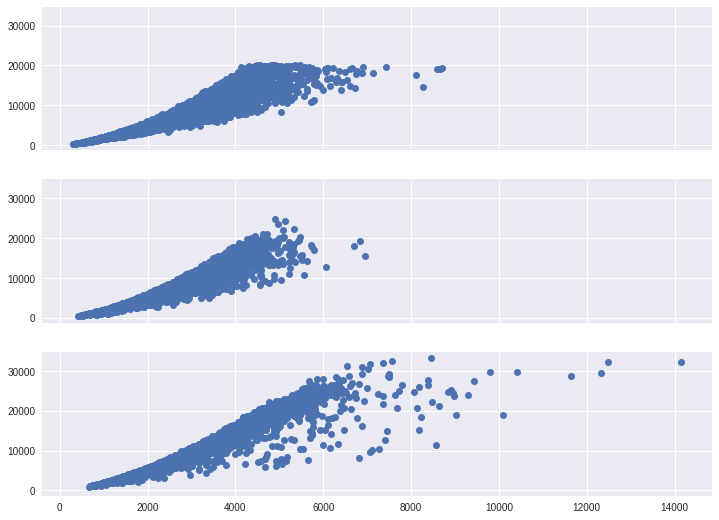

In [4]:
fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(12,9))
ax[0].plot(raw['surface'], raw['volume'], 'o')
ax[1].plot(vae['surface'], vae['volume'], 'o')
ax[2].plot(gan['surface'], gan['volume'], 'o')
# ax[3].plot(test['surface'], test['volume'], 'o')

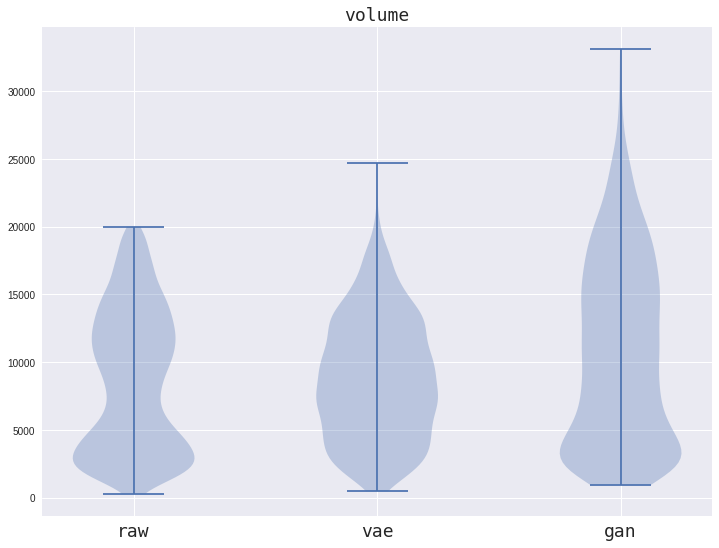

In [5]:
plotFeature('volume', figsize=(12, 9))

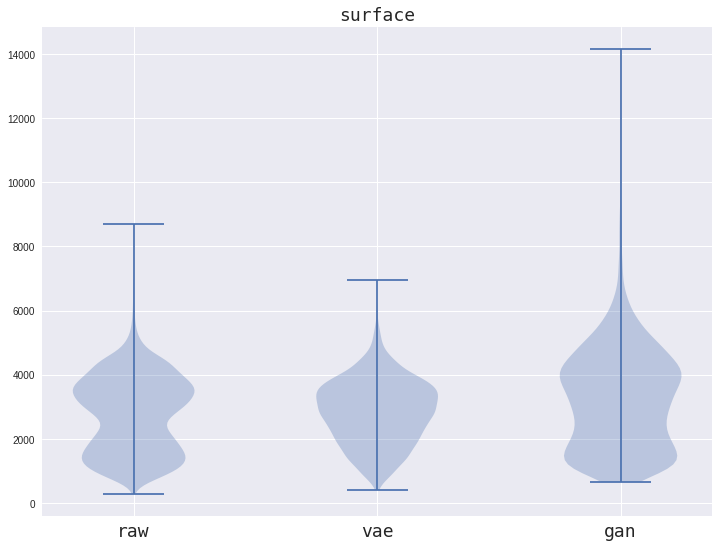

In [6]:
plotFeature('surface', figsize=(12, 9))

## 以下为形状参数

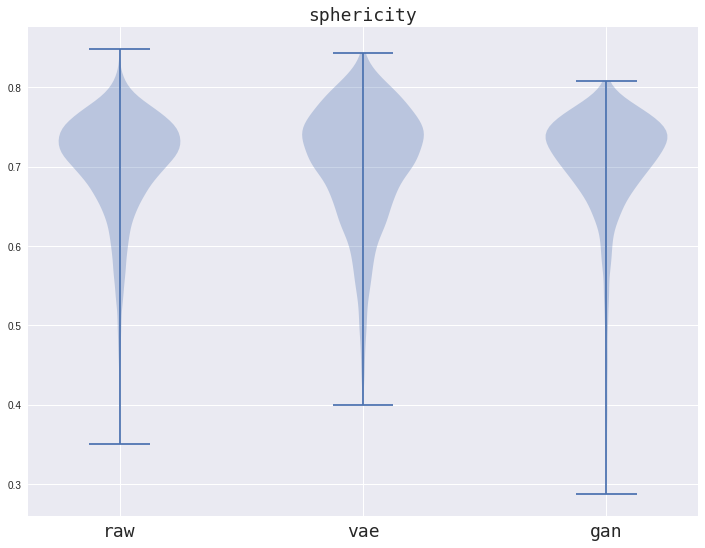

In [7]:
plotFeature('sphericity', figsize=(12, 9))

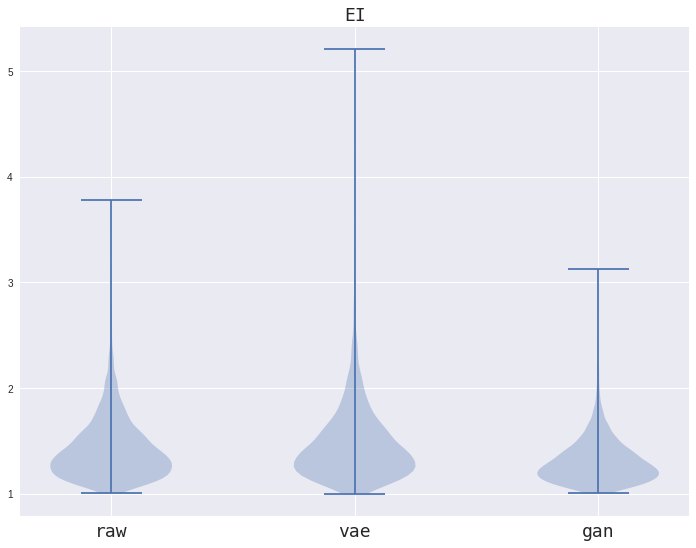

In [8]:
plotFeature('EI', figsize=(12, 9))

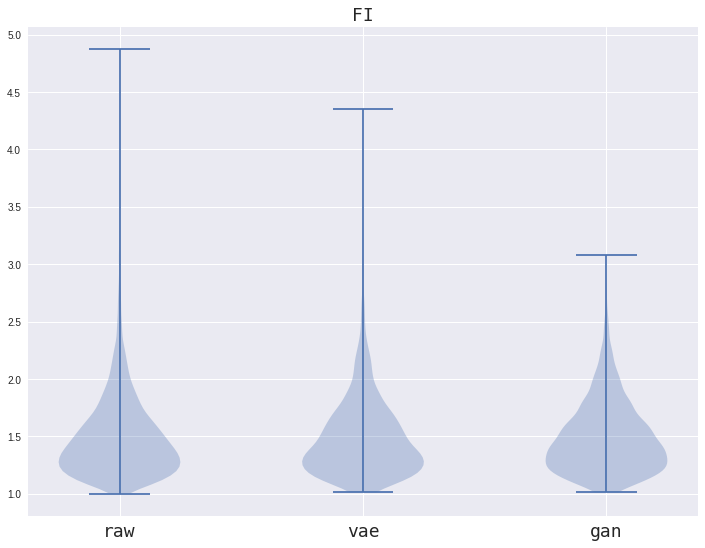

In [9]:
plotFeature('FI', figsize=(12, 9))

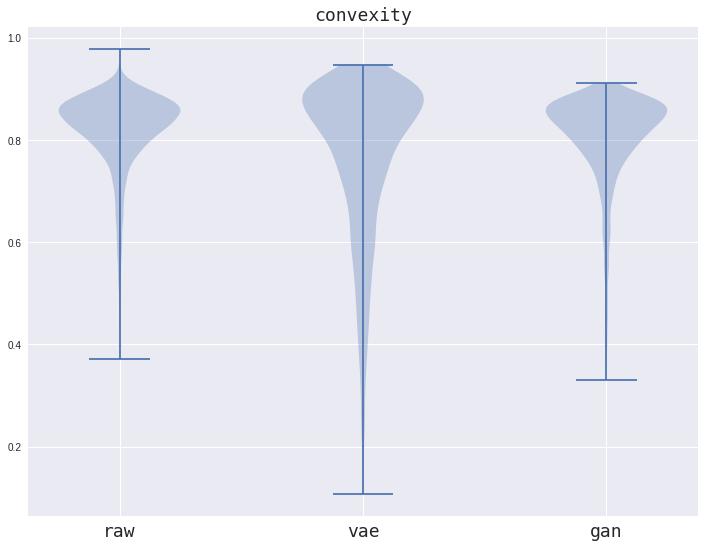

In [10]:
plotFeature('convexity', figsize=(12, 9))

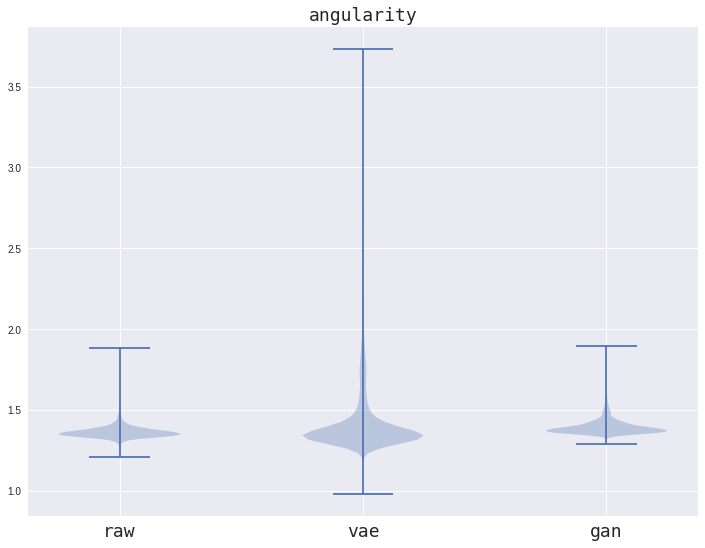

In [11]:
plotFeature('angularity', figsize=(12, 9))

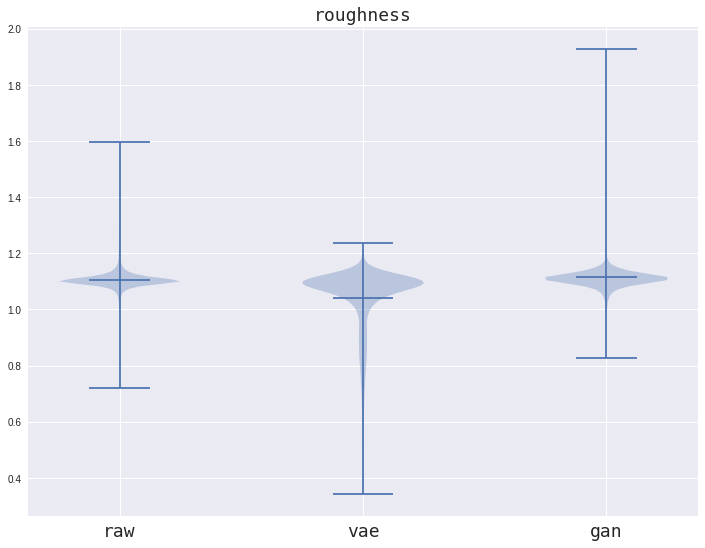

In [12]:
plotFeature('roughness', figsize=(12, 9), showmeans=True)

In [13]:
print(raw['surface'].shape, vae['surface'].shape, gan['surface'].shape)

(8998,) (2999,) (2996,)


In [14]:
# rawCubes = np.load('data/train_set.npy')
vaeCubes = np.load('output/geometry/generated_particles/vae.npy')
ganCubes = np.load('output/geometry/generated_particles/gan.npy')
vaeCubes[vaeCubes <= 0.5] = 0
vaeCubes[vaeCubes > 0.5] = 1
ganCubes[ganCubes <= 0.5] = 0
ganCubes[ganCubes > 0.5] = 1
def plotCube(cube):
    from skimage.measure import marching_cubes
    verts, faces, *_ = marching_cubes(cube)

    ax = plt.axes(projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:, 1], verts[:, 2], triangles=faces)
    # ax.set_aspect('equal')
    plt.axis('off')
    return ax

<IPython.core.display.Javascript object>


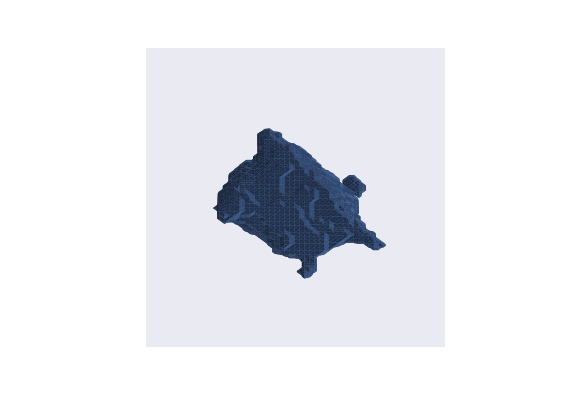

In [15]:
%matplotlib notebook
i = 10
cube = vaeCubes[i, 0]
ax = plotCube(cube)